In [1]:
import random
import matplotlib.pyplot as plt
class Distances:

    def __init__(self):
        self.distances = distances = [
            [0, 2, 1, 4, 9, 1],  # Cidade 0
            [2, 0, 5, 9, 7, 2],  # Cidade 1
            [1, 5, 0, 3, 8, 6],  # Cidade 2
            [4, 9, 3, 0, 2, 6],  # Cidade 3
            [9, 7, 8, 2, 0, 2],  # Cidade 4
            [1, 2, 6, 6, 2, 0]   # Cidade 5
        ]
        self.city_coords = [(0, 0), (1, 2), (3, 1), (2, 4), (4, 3), (5, 1)]
        self.tour = self.get_initial_tour()
        self.linked_cities = self.tour_to_edges(self.tour)
        self.total_distance = self.get_total_distance()
    def get_total_distance(self):
        total = 0
        for i in range(len(self.tour)):
            j = (i + 1) % len(self.tour)
            total += self.get_distance(self.tour[i], self.tour[j])
        return total

    def tour_to_edges(self, tour):
        """Converte tour (lista ordenada) em conjunto de arestas"""
        edges = set()
        for i in range(len(tour)):
            j = (i + 1) % len(tour)
            edges.add((tour[i], tour[j]))
        return edges
    def get_distance(self, i, j):
        return self.distances[i][j]
    def get_initial_tour(self):
        """Inicializa com triângulo (tour ordenado)"""
        return [0, 1, 2]

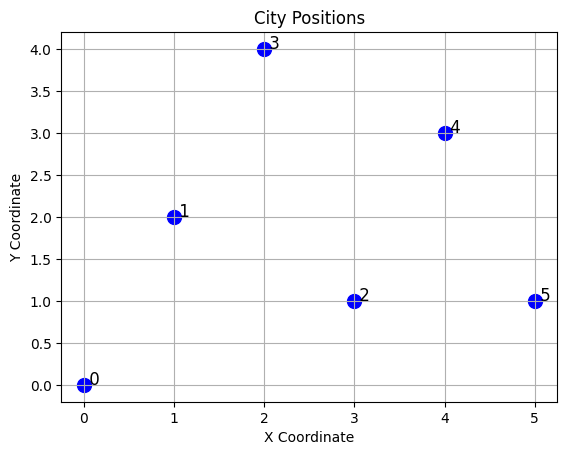

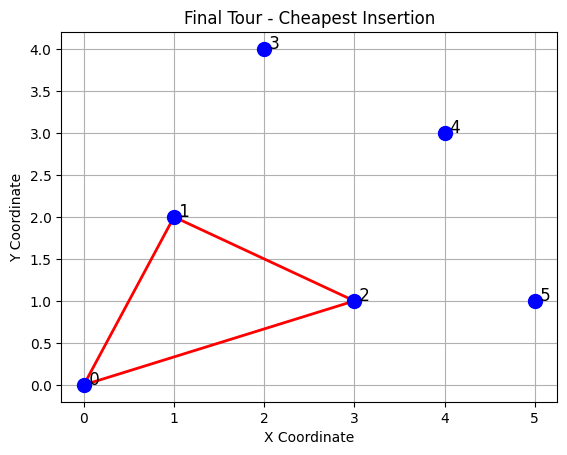

In [2]:
class Distances(Distances):
  def plot_linked_cities(self):
          # Plota todas as cidades
          for idx, (x, y) in enumerate(self.city_coords):
              plt.scatter(x, y, color='blue', s=100, zorder=3)
              plt.text(x, y, f' {idx}', fontsize=12, ha='left')

          # Plota as arestas do tour final
          for (i, j) in self.linked_cities:
              x_coords = [self.city_coords[i][0], self.city_coords[j][0]]
              y_coords = [self.city_coords[i][1], self.city_coords[j][1]]
              plt.plot(x_coords, y_coords, 'ro-', linewidth=2, markersize=8)

          plt.xlabel('X Coordinate')
          plt.ylabel('Y Coordinate')
          plt.title('Final Tour - Cheapest Insertion')
          plt.grid()
          plt.show()

  def plot_potential_cities(self):
          # Plota apenas as posições das cidades
          for idx, (x, y) in enumerate(self.city_coords):
              plt.scatter(x, y, color='blue', s=100)
              plt.text(x, y, f' {idx}', fontsize=12, ha='left')
          plt.xlabel('X Coordinate')
          plt.ylabel('Y Coordinate')
          plt.title('City Positions')
          plt.grid()
          plt.show()
distances = Distances()
distances.plot_potential_cities()
distances.plot_linked_cities()

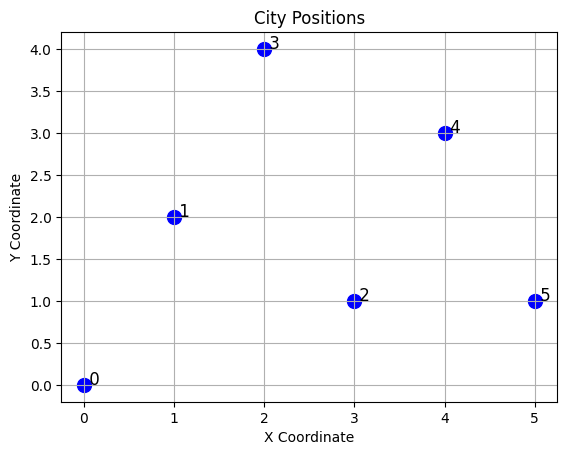

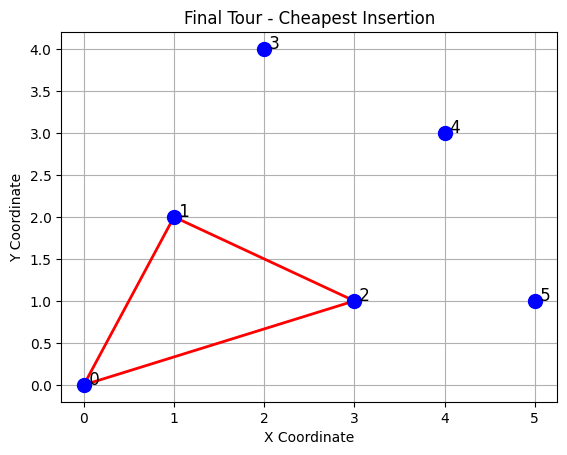

In [3]:
class Distances(Distances):
  def plot_linked_cities(self):
          # Plota todas as cidades
          for idx, (x, y) in enumerate(self.city_coords):
              plt.scatter(x, y, color='blue', s=100, zorder=3)
              plt.text(x, y, f' {idx}', fontsize=12, ha='left')

          # Plota as arestas do tour final
          for (i, j) in self.linked_cities:
              x_coords = [self.city_coords[i][0], self.city_coords[j][0]]
              y_coords = [self.city_coords[i][1], self.city_coords[j][1]]
              plt.plot(x_coords, y_coords, 'ro-', linewidth=2, markersize=8)

          plt.xlabel('X Coordinate')
          plt.ylabel('Y Coordinate')
          plt.title('Final Tour - Cheapest Insertion')
          plt.grid()
          plt.show()

  def plot_potential_cities(self):
          # Plota apenas as posições das cidades
          for idx, (x, y) in enumerate(self.city_coords):
              plt.scatter(x, y, color='blue', s=100)
              plt.text(x, y, f' {idx}', fontsize=12, ha='left')
          plt.xlabel('X Coordinate')
          plt.ylabel('Y Coordinate')
          plt.title('City Positions')
          plt.grid()
          plt.show()
distances = Distances()
distances.plot_potential_cities()
distances.plot_linked_cities()

Tour final: [0, 5, 4, 1, 2, 3]
Distance = 22
Ideal edges = {(1, 2), (5, 4), (3, 0), (2, 3), (0, 5), (4, 1)}


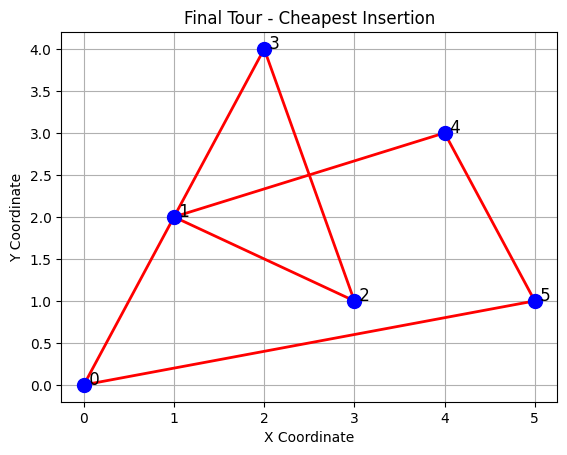

In [4]:
import random
class Distances(Distances):
    def __init__(self):
        super().__init__()
        self.processed = len(self.tour)

    def insert_ideal_node(self):
        """Insere a cidade não visitada que causa o menor aumento no tour"""
        # Cidades já no tour
        cities_in_tour = set(self.tour)
        all_cities = set(range(len(self.city_coords)))
        cities_not_in_tour = all_cities - cities_in_tour

        if not cities_not_in_tour:
            return False

        min_cost = float('inf')
        best_insertion = None

        # Para cada posição no tour
        for pos in range(len(self.tour)):
            i = self.tour[pos]
            j = self.tour[(pos + 1) % len(self.tour)]

            # Tenta inserir cada cidade não visitada
            for k in cities_not_in_tour:
                # Custo: remove aresta (i,j), adiciona (i,k) e (k,j)
                cost_change = (self.get_distance(i, k) +
                              self.get_distance(k, j) -
                              self.get_distance(i, j))

                if cost_change < min_cost:
                    min_cost = cost_change
                    best_insertion = (pos, k, cost_change)

        if best_insertion:
            pos, k, cost = best_insertion
            # Insere cidade k após posição pos
            self.tour.insert(pos + 1, k)
            # Atualiza arestas
            self.linked_cities = self.tour_to_edges(self.tour)
            self.processed += 1
            return True

        return False
distances = Distances()
while distances.insert_ideal_node():
    pass
print(f"Tour final: {distances.tour}")
print(f"Distance = {distances.get_total_distance()}")
print(f"Ideal edges = {distances.linked_cities}")
distances.plot_linked_cities()

# New Section